___
# Atividade: Variáveis qualitativas com a PNAD (ALUNOS)
___
Felipe Scandiuzzi Moreira Netto e Victor Hugo Leal Vieira da Silva - Turma C

Atividade opicional
## Aula 02


**Link úteis:**
1.	Leitura prévia necessária: Magalhães e Lima (7ª. Edição): pág. 9 a 16 – destacando para variáveis qualitativas.
2.	10 Minutes to Pandas: http://pandas.pydata.org/pandas-docs/stable/10min.html
3.	Essential Basic Functionality: http://pandas.pydata.org/pandas-docs/stable/basics.html
4.  Estude a aula `Aula02 Análise Exploratoria Variáveis Qualitativas-ALUNOS.ipynb`, o qual contém uma introdução ao Jupyter Notebook. A publicação dessa aula tem como objetivo auxiliá-lo, caso queira, no desenvolvimento dos seus próximos programas, como esta atividade.

**Hoje:**
1.	Analisar variáveis qualitativas de forma uni e bivariadas utilizando tabelas de frequências e gráficos de barras e de pizza (ou setor).
2.  Trabalhar com a base de dados da PNAD 2013 - Pesquisa Nacional por Amostra de Domicílios

**Próxima aula:**
1.	Leitura prévia necessária: Magalhães e Lima (7ª. Edição): pág. 9 a 17 – destacando para variáveis quantitativas; pág. 106 e 107 (Definição 4.1 e Exemplo 4.1).

___


___
## <font color='blue'>PNAD 2013 – PESQUISA NACIONAL POR AMOSTRA DE DOMICÍLIOS</font>

**Base de dados reduzida: ** `pes2013A.txt` (75 MB)
[Acesse a base de dados aqui: https://dl.dropboxusercontent.com/u/65763596/Aula02/pes2013A.txt] 

**Dicionário das variáveis: ** `Dicionário de variáveis de pessoas - PNAD 2013.xlsx`
[Acesse dicionário aqui: https://dl.dropboxusercontent.com/u/65763596/Aula02/Dicion%C3%A1rio%20de%20vari%C3%A1veis%20de%20pessoas%20-%20PNAD%202013.xls]


Muitos especialistas na área de negócios dizem que empresários mais bem sucedidos são aqueles que fazem um planejamento antes de começar seu próprio negócio. Nessa visão, imagine que o Sr. Gold tenha como grande objetivo abrir uma nova faculdade e para isso deseja estudar o perfil do estudante que cursa ensino médio ou pré-vestibular e do que cursa ensino superior. 

Assuma que as variáveis de interesse a respeito dos estudantes sejam relativamente as mesmas de 2013 até o momento atual. Nesse caso, seja criativo para ajudar o Sr. Gold que deseja abrir seu negócio, mas não tem certeza sobre quais variáveis o interessam. 

Vocês podem ajudá-lo?!  

As variáveis a seguir devem fazer parte da sua análise:

* V0302: sexo
* V0404: cor ou raça
* V6002: rede de ensino
* V4802: nível de ensino e grupos de séries do ensino fundamental que frequentavam (todos os estudantes)

** Crie uma variável com região do indivíduo amostrado considerando a variável `UF` que define o estado e também trabalhe com essa nova variável em suas análises. ** 

** Escolha mais pelo menos DUAS variáveis qualitativas para completar sua análise!! **

Faça uma análise exploratória apenas com as variáveis qualitativas com foco no objetivo do Sr. Gold.

Sua análise deve conter pelo menos uma das seguintes visualizações:

1. Gráfico de colunas (bar) e setor (pie) com as frequências relativas cadas categorias das variáveis qualitativas.
2. Tabela cruzada entre pares de variaveis qualitativas. Montar o gráfico de colunas. Repetir o processo habilitando a opção "stacked=True".


___


<font color='red'>
Crie um repositório chamado CD em seu Github
</font>


Neste repositório, salve seu trabalho numa pasta chamada aula2

Por exemplo, se seu login for *pikachu* o projeto vai estar na pasta:

https://github.com/<font color=red>pikachu/CD/aula2</font>



## <font color='red'>Terça-feira (dia 16/08), no horário de atendimento da sua turma, deverá apresentar aos NINJAS!!</font>
___

In [5]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [6]:
# Importar excel no jupyter
dados = pd.read_excel('Nosso PNAD.xlsx')

# Testar se funciona
dados.head()

,UF,V0302,V0404,V0601,V6002,V6003,V4802
1,11,4,2,1,NaN,NaN,NaN
2,11,4,8,3,NaN,NaN,NaN
3,11,4,4,1,2.0,1.0,8.0
4,11,2,8,1,NaN,NaN,NaN
5,11,4,8,1,4.0,5.0,11.0


([<matplotlib.patches.Wedge at 0x1a6fe57f5c0>,
  <matplotlib.text.Text at 0x1a6ffaee9e8>])

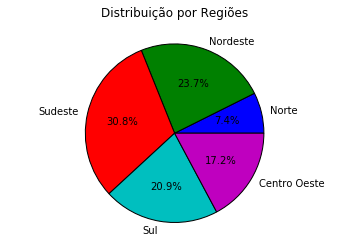

In [7]:
# Separar as UF em regiões através de cortes
Norte = dados[(dados["UF"] > 10) & (dados["UF"] < 18)].iloc[:,0:1]
Nordeste = dados[(dados["UF"] >=21) & ( dados["UF"] <= 29)].iloc[:,0:1]
Sudeste = dados[(dados["UF"] >=31) & ( dados["UF"] <= 35)].iloc[:,0:1]
Sul = dados[(dados["UF"] >=41) & ( dados["UF"] <= 43)].iloc[:,0:1]
CO = dados[(dados["UF"] >=50) & ( dados["UF"] <= 53)].iloc[:,0:1] 

# Somar a população das regiões
Soma_Norte = Norte.sum()
Soma_Nordeste = Nordeste.sum()
Soma_Sudeste = Sudeste.sum()
Soma_Sul = Sul.sum()
Soma_CO = CO.sum()

# Soma de todas as populações
Soma_Total = dados.UF.sum()

# Preparar porcentagens
Porcentagem_Norte = (Soma_Norte/ Soma_Total) * 100
Porcentagem_Nordeste = (Soma_Nordeste/ Soma_Total) * 100
Porcentagem_Sudeste = (Soma_Sudeste/ Soma_Total) * 100
Porcentagem_Sul = (Soma_Sul/ Soma_Total) * 100
Porcentagem_CO = (Soma_CO/ Soma_Total) * 100

# Lista de valores e legendas para o plot

lista = [Porcentagem_Norte , Porcentagem_Nordeste, Porcentagem_Sudeste, Porcentagem_Sul, Porcentagem_CO]
label_lista = ["Norte" , "Nordeste", "Sudeste", "Sul", "Centro Oeste"]

# plot do gráfico de pizza
plt.axis('equal')
plt.title("Distribuição por Regiões")
plt.pie(lista, labels = label_lista, autopct = '%1.1f%%')


In [8]:
# Dar nome as categorias
dados.UF = dados.UF.astype('category')
dados.UF.cat.categories = ('Rondônia',
'Acre',
'Amazonas',
'Roraima',
'Pará',
'Amapá',
'Tocantins',
'Maranhão',
'Piauí',
'Ceará',
'Rio Grande do Norte',
'Paraíba',
'Pernambuco',
'Alagoas',
'Sergipe',
'Bahia',
'Minas Gerais',
'Espírito Santo',
'Rio de Janeiro',
'São Paulo',
'Paraná',
'Santa Catarina',
'Rio Grande do Sul',
'Mato Grosso do Sul',
'Mato Grosso',
'Goiás',
'Distrito Federal'
)

# Dar nome as categorias
dados.V0302 = dados.V0302.astype('category')
dados.V0302.cat.categories = ('Homem', 'Mulher')

# Plotar a tabela
pd.crosstab(dados.UF, dados.V0302)

V0302,Homem,Mulher
UF,,
Rondônia,3609,3511
Acre,2226,2249
Amazonas,6538,6485
Roraima,1395,1372
Pará,11110,11345
Amapá,1445,1445
Tocantins,3169,3288
Maranhão,4591,4679
Piauí,2720,2872


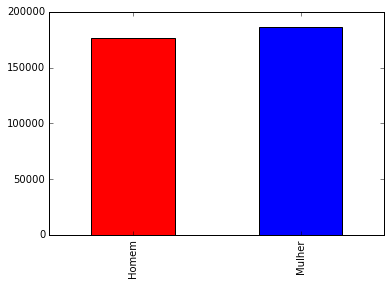

In [9]:
# plotar o gráfico
dfc = dados.V0302.value_counts()
dfc2 = dfc.reindex(["Homem",  "Mulher"])
dfc2.plot(kind='bar', color=('red', 'blue'), legend=False)


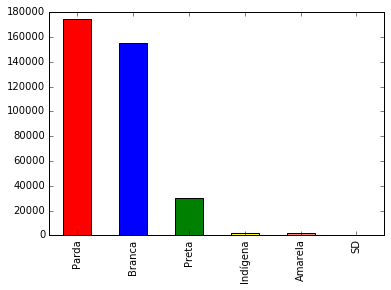

In [10]:
# Dar nome as categorias
dados.V0404 = dados.V0404.astype('category')
dados.V0404.cat.categories = ('Indígena', 'Branca', 'Preta', 'Amarela', 'Parda','SD')

# Plotar o gráfico
Abc = dados.V0404.value_counts()
Abc.plot(kind='bar', color= ('red', 'blue', 'green', 'yellow', 'salmon'), legend=False)

In [11]:
pd.crosstab(dados.V0404, dados.V0601)

V0601,1,3
V0404,,
Indígena,1224,464
Branca,134470,20748
Preta,25477,4653
Amarela,1343,128
Parda,142895,31147
SD,0,6


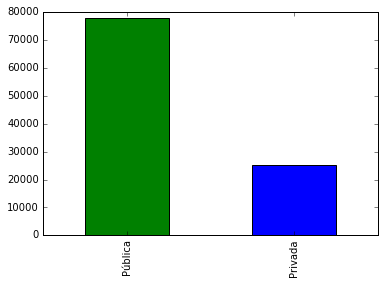

In [12]:
# Dar nome as categorias
dados.V6002 = dados.V6002.astype('category')
dados.V6002.cat.categories = ('Pública', 'Privada')

# Plotar o gráfico
A = dados.V6002.value_counts()
A.plot(kind='bar', color= ('green', 'blue'), legend=False)

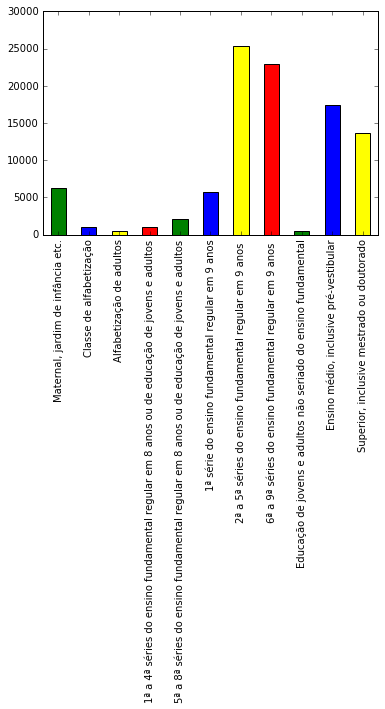

In [20]:
# Dar nome as categorias
dados.V4802 = dados.V4802.astype('category')

dados.V4802.cat.categories = ('Maternal, jardim de infância etc.', "Classe de alfabetização", "Alfabetização de adultos",
                              "1ª a 4ª séries do ensino fundamental regular em 8 anos ou de educação de jovens e adultos",
                              "5ª a 8ª séries do ensino fundamental regular em 8 anos ou de educação de jovens e adultos",
                              "1ª série do ensino fundamental regular em 9 anos", "2ª a 5ª séries do ensino fundamental regular em 9 anos ",
                              "6ª a 9ª séries do ensino fundamental regular em 9 anos ",
                              "Educação de jovens e adultos não seriado do ensino fundamental",
                              "Ensino médio, inclusive pré-vestibular",
                              "Superior, inclusive mestrado ou doutorado")

# Plotar o gráfico
cas = dados.V4802.value_counts()

cas2.plot(kind='bar', color= ('green', 'blue', 'yellow', 'red'), legend=False)

([<matplotlib.patches.Wedge at 0x1a6fa6542e8>,
  <matplotlib.text.Text at 0x1a6fa5de1d0>])

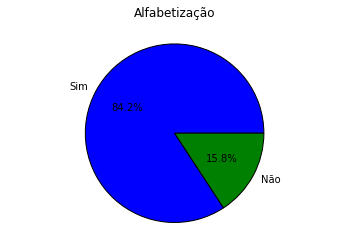

In [14]:
# Dar nome as categorias
dados.V0601 = dados.V0601.astype('category')
dados.V0601.cat.categories = ('Sim', 'Não')

# Plotar o gráfico
A = dados.V0601.value_counts()

label_lista = ['Sim','Não']
plt.axis('equal')
plt.title("Alfabetização")
plt.pie(A, labels = label_lista, autopct = '%1.1f%%')

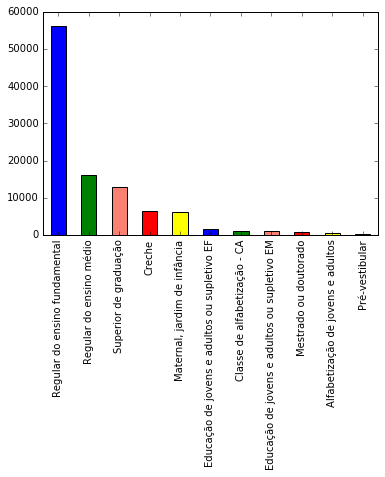

In [28]:
# Dar nome as categorias
dados.V6003 = dados.V6003.astype('category')
dados.V6003.cat.categories = ('Regular do ensino fundamental', 'Regular do ensino médio', 'Educação de jovens e adultos ou supletivo EF', 
                 'Educação de jovens e adultos ou supletivo EM', 'Superior de graduação', 'Alfabetização de jovens e adultos',
                 'Creche', 'Classe de alfabetização - CA', 'Maternal, jardim de infância', 'Pré-vestibular', 'Mestrado ou doutorado')

c1 = dados.V6003.value_counts()

c1.plot(kind='bar', color = ('blue', 'green', 'salmon','red', 'yellow'), legend=False)